In [81]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [82]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    

    return np.sqrt(np.sum(np.square(p-q)))

In [83]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here

    return _dist(p, q) <= eps

In [84]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    
    for idx in range(n_points):
        if  _eps_neighborhood(m[:, point_id], m[:, idx], eps):
            seeds.append(idx)
        
    return seeds

In [85]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below

    classifications[point_id] = cluster_id

    # a stack save point that waiting for being visited
    stack = [point_id]
    # list of point id already visited
    cluster_points = []

    # pop last  point and visit it, then push it's eps neighbor to stack if it haven't been visited
    while stack:

        curr_id = stack.pop()
        neighbor_ids = _region_query(m, curr_id, eps)

        if len(neighbor_ids) >= min_points:

            for neighbor_id in neighbor_ids:
                if not neighbor_id in cluster_points and not neighbor_id == curr_id:
                    stack.append(neighbor_id)

        # add to cluster
        cluster_points.append(curr_id)            
        if classifications[curr_id] == UNCLASSIFIED or classifications[curr_id] == NOISE:
            classifications[curr_id] = cluster_id

    # I guess the return value from description is for the recursive method to decide if we need to stop
    # but I just use loop and no need to return anything


In [86]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here

    # visit all point
    for idx in range(n_points):

        # already visited, pass it
        if classifications[idx] != UNCLASSIFIED:
            continue

        # find eps-neighbor and test the amount
        neighbor_ids = _region_query(m, idx, eps)
        if len(neighbor_ids) < min_points:
            # too less eps-neighbor, mark as noise
            classifications[idx] = NOISE
        else:
            # expend the cluster and go next cluster
            _expand_cluster(m, classifications, idx, cluster_id, eps, min_points)
            cluster_id += 1

    return classifications

In [87]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [88]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

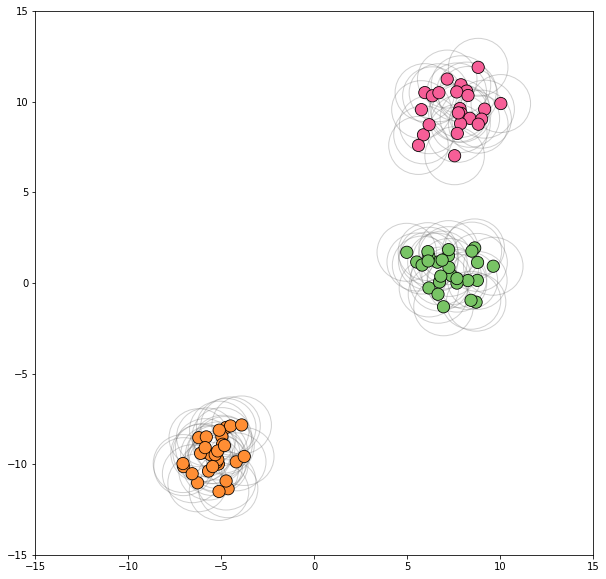

In [89]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [90]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [91]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

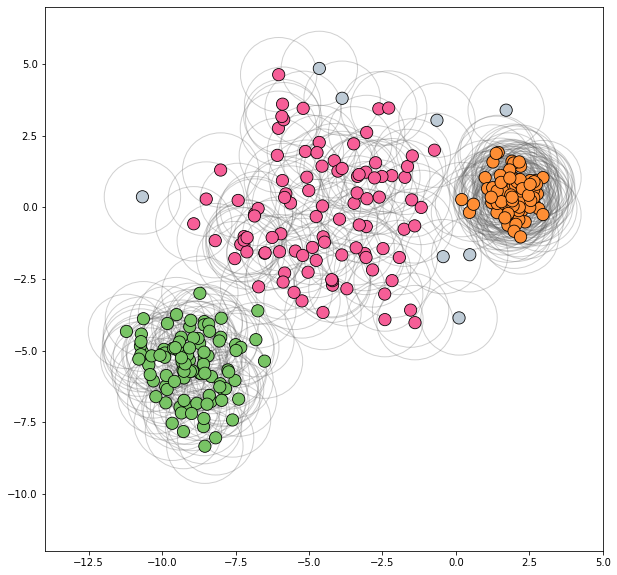

In [92]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
